In [29]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [3]:
!wget -O Data-Collisions.csv https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv

--2020-09-09 15:34:11--  https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv
Resolving s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)... 67.228.254.196
Connecting to s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73917638 (70M) [text/csv]
Saving to: ‘Data-Collisions.csv’

Data-Collisions.csv 100%[===================>]  70.49M  23.0MB/s    in 3.2s    

2020-09-09 15:34:14 (22.3 MB/s) - ‘Data-Collisions.csv’ saved [73917638/73917638]



In [4]:
df = pd.read_csv('Data-Collisions.csv')
df.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 38 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   SEVERITYCODE    194673 non-null  int64  
 1   X               189339 non-null  float64
 2   Y               189339 non-null  float64
 3   OBJECTID        194673 non-null  int64  
 4   INCKEY          194673 non-null  int64  
 5   COLDETKEY       194673 non-null  int64  
 6   REPORTNO        194673 non-null  object 
 7   STATUS          194673 non-null  object 
 8   ADDRTYPE        192747 non-null  object 
 9   INTKEY          65070 non-null   float64
 10  LOCATION        191996 non-null  object 
 11  EXCEPTRSNCODE   84811 non-null   object 
 12  EXCEPTRSNDESC   5638 non-null    object 
 13  SEVERITYCODE.1  194673 non-null  int64  
 14  SEVERITYDESC    194673 non-null  object 
 15  COLLISIONTYPE   189769 non-null  object 
 16  PERSONCOUNT     194673 non-null  int64  
 17  PEDCOUNT  

In [6]:
plot_df = df.groupby(["WEATHER"]).count().sort_values(["SEVERITYCODE"],ascending=False).rename(columns={"SEVERITYCODE" : "Total Cases"}).reset_index()
plot_df.head()

,WEATHER,Total Cases,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,Clear,111135,108959,108959,111135,111135,111135,111135,111135,110626,...,111116,111027,2820,65582,4111,111130,111129,111135,111135,111135
1,Raining,33145,32015,32015,33145,33145,33145,33145,33145,33004,...,33141,33121,1002,20472,3280,33138,33138,33145,33145,33145
2,Overcast,27714,27136,27136,27714,27714,27714,27714,27714,27584,...,27702,27693,680,17347,1557,27708,27708,27714,27714,27714
3,Unknown,15091,13893,13893,15091,15091,15091,15091,15091,14107,...,15080,15046,124,9824,98,15091,15089,15091,15091,15091
4,Snowing,907,894,894,907,907,907,907,907,902,...,907,901,10,621,185,907,907,907,907,907


<AxesSubplot:xlabel='WEATHER'>

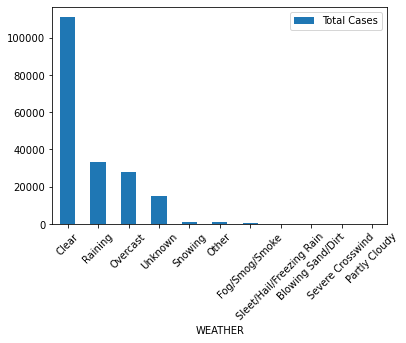

In [11]:
plot_df.plot.bar(x='WEATHER', y='Total Cases', rot=45)

In [7]:
Collisions = df[['SEVERITYCODE','ADDRTYPE','WEATHER','ROADCOND','LIGHTCOND','INCDTTM']]
Collisions.head()

,SEVERITYCODE,ADDRTYPE,WEATHER,ROADCOND,LIGHTCOND,INCDTTM
0,2,Intersection,Overcast,Wet,Daylight,3/27/2013 2:54:00 PM
1,1,Block,Raining,Wet,Dark - Street Lights On,12/20/2006 6:55:00 PM
2,1,Block,Overcast,Dry,Daylight,11/18/2004 10:20:00 AM
3,1,Block,Clear,Dry,Daylight,3/29/2013 9:26:00 AM
4,2,Intersection,Raining,Wet,Daylight,1/28/2004 8:04:00 AM


In [8]:
Collisions.groupby(['ADDRTYPE'])['SEVERITYCODE'].value_counts(normalize=True)

ADDRTYPE      SEVERITYCODE
Alley         1               0.890812
              2               0.109188
Block         1               0.762885
              2               0.237115
Intersection  1               0.572476
              2               0.427524
Name: SEVERITYCODE, dtype: float64

In [9]:
Collisions.groupby(['WEATHER'])['SEVERITYCODE'].value_counts(normalize=True)

WEATHER                   SEVERITYCODE
Blowing Sand/Dirt         1               0.732143
                          2               0.267857
Clear                     1               0.677509
                          2               0.322491
Fog/Smog/Smoke            1               0.671353
                          2               0.328647
Other                     1               0.860577
                          2               0.139423
Overcast                  1               0.684456
                          2               0.315544
Partly Cloudy             2               0.600000
                          1               0.400000
Raining                   1               0.662815
                          2               0.337185
Severe Crosswind          1               0.720000
                          2               0.280000
Sleet/Hail/Freezing Rain  1               0.752212
                          2               0.247788
Snowing                   1               0

In [15]:
Collisions.groupby(['ROADCOND'])['SEVERITYCODE'].value_counts(normalize=True)

ROADCOND        SEVERITYCODE
Dry             1               0.678227
                2               0.321773
Ice             1               0.774194
                2               0.225806
Oil             1               0.625000
                2               0.375000
Other           1               0.674242
                2               0.325758
Sand/Mud/Dirt   1               0.693333
                2               0.306667
Snow/Slush      1               0.833665
                2               0.166335
Standing Water  1               0.739130
                2               0.260870
Unknown         1               0.950325
                2               0.049675
Wet             1               0.668134
                2               0.331866
Name: SEVERITYCODE, dtype: float64

In [10]:
Collisions.groupby(['LIGHTCOND'])['SEVERITYCODE'].value_counts(normalize=True)

LIGHTCOND                 SEVERITYCODE
Dark - No Street Lights   1               0.782694
                          2               0.217306
Dark - Street Lights Off  1               0.736447
                          2               0.263553
Dark - Street Lights On   1               0.701589
                          2               0.298411
Dark - Unknown Lighting   1               0.636364
                          2               0.363636
Dawn                      1               0.670663
                          2               0.329337
Daylight                  1               0.668116
                          2               0.331884
Dusk                      1               0.670620
                          2               0.329380
Other                     1               0.778723
                          2               0.221277
Unknown                   1               0.955095
                          2               0.044905
Name: SEVERITYCODE, dtype: float64

In [17]:
df['SEVERITYCODE'].value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

In [18]:
dataset = df.drop(columns = ['X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY',
       'REPORTNO', 'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION',
       'EXCEPTRSNCODE', 'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC',
       'COLLISIONTYPE', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT',
       'VEHCOUNT', 'INCDATE', 'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE',
       'SDOT_COLDESC', 'INATTENTIONIND', 'UNDERINFL', 'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING',
       'ST_COLCODE', 'ST_COLDESC', 'SEGLANEKEY', 'CROSSWALKKEY',
       'HITPARKEDCAR'])
dataset.shape

(194673, 4)

In [19]:
rain_data = dataset[(dataset['WEATHER'] == 'Raining')].copy()
rain_data.head()

,SEVERITYCODE,WEATHER,ROADCOND,LIGHTCOND
1,1,Raining,Wet,Dark - Street Lights On
4,2,Raining,Wet,Daylight
6,1,Raining,Wet,Daylight
12,1,Raining,Wet,Dark - Street Lights On
13,1,Raining,Wet,Dark - No Street Lights


In [20]:
rain_data['SEVERITYCODE'].value_counts()

1    21969
2    11176
Name: SEVERITYCODE, dtype: int64

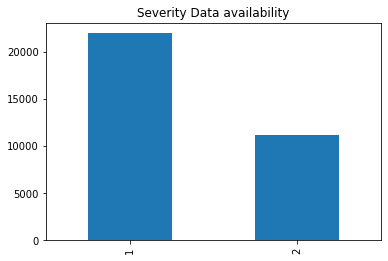

In [21]:
severity_unbalanced = rain_data['SEVERITYCODE'].value_counts().plot(kind='bar',title="Severity Data availability")

In [23]:
CollisionFeature = Collisions[['DAYOFWEEK']]
CollisionFeature = pd.concat([CollisionFeature,pd.get_dummies(df['ADDRTYPE']),pd.get_dummies(df['WEATHER']),pd.get_dummies(df['ROADCOND']),pd.get_dummies(df['LIGHTCOND'])], axis=1)
# CollisionFeature = pd.concat([CollisionFeature,pd.get_dummies(df['WEATHER'])], axis=1)
CollisionFeature.head()

,DAYOFWEEK,Alley,Block,Intersection,Blowing Sand/Dirt,Clear,Fog/Smog/Smoke,Other,Overcast,Partly Cloudy,...,Wet,Dark - No Street Lights,Dark - Street Lights Off,Dark - Street Lights On,Dark - Unknown Lighting,Dawn,Daylight,Dusk,Other,Unknown
0,2,0,0,1,0,0,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0
1,2,0,1,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
2,3,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,4,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,2,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0


In [24]:
X = CollisionFeature
y = Collisions['SEVERITYCODE'].values

In [25]:
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


array([[-0.48852801, -0.06223095, -1.36876932,  1.41129279, -0.01696304,
        -1.15340914, -0.05414257, -0.06551471,  2.45445634, -0.00506801,
        -0.45298634, -0.011333  , -0.02409974, -0.06841713, -0.28988624,
        -1.33213439, -0.07905204, -0.01813462, -0.02604842, -0.01963186,
        -0.07200071, -0.02431221, -0.28975087,  1.76085874, -0.08920831,
        -0.07872239, -0.576075  , -0.00751719, -0.1141037 ,  0.82233559,
        -0.17682024, -0.03476509, -0.27267986],
       [-0.48852801, -0.06223095,  0.73058329, -0.70857019, -0.01696304,
        -1.15340914, -0.05414257, -0.06551471, -0.4074222 , -0.00506801,
         2.2075721 , -0.011333  , -0.02409974, -0.06841713, -0.28988624,
        -1.33213439, -0.07905204, -0.01813462, -0.02604842, -0.01963186,
        -0.07200071, -0.02431221, -0.28975087,  1.76085874, -0.08920831,
        -0.07872239,  1.73588509, -0.00751719, -0.1141037 , -1.21604855,
        -0.17682024, -0.03476509, -0.27267986],
       [ 0.03188685, -0.0622

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.90)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (19467, 33) (19467,)
Test set: (175206, 33) (175206,)


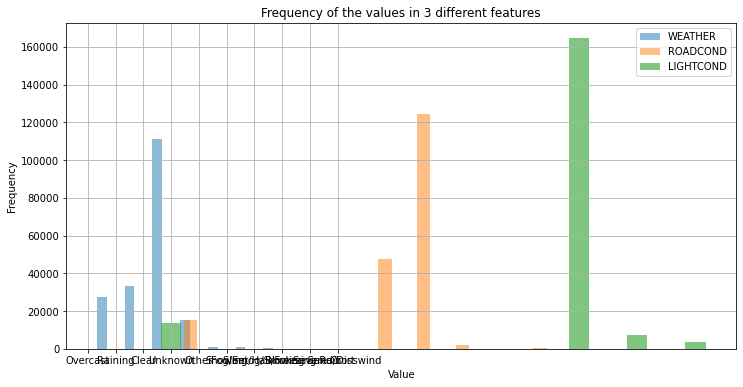

In [35]:
df['WEATHER'].hist(alpha=0.5, rwidth=0.35, align='mid', figsize=(12,6), label='WEATHER')
df['ROADCOND'].hist(alpha=0.5, rwidth=0.35, align='mid', label='ROADCOND')
df['LIGHTCOND'].hist(alpha=0.6, rwidth=0.35, align='left', label='LIGHTCOND')
plt.title('Frequency of the values in 3 different features', size=12)
plt.xticks(range(10))
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()